In [1]:
import pandas as pd
%matplotlib inline
from aws_helpers import execute_athena_query

results_url = execute_athena_query("select * from weather")
df = pd.read_csv(results_url)
df = df.drop_duplicates()

df

Executing: select * from weather
Wait count 0/30
Wait count 1/30
Query succeeded


,observation_ts,site_id,site_name,site_country,site_continent,site_elevation,lat,lon,wind_direction,screen_relative_humidity,pressure,wind_speed,temperature,visibility,weather_type,pressure_tendency,dew_point,year,month,day
0,2021-12-18 23:00:00.000,3002,BALTASOUND,SCOTLAND,EUROPE,15.0,60.749,-0.854,NW,93.3,1035.0,16.0,8.5,8000.0,11.0,R,7.5,2021,12,19
1,2021-12-19 00:00:00.000,3002,BALTASOUND,SCOTLAND,EUROPE,15.0,60.749,-0.854,NW,92.6,1035.0,15.0,8.1,10000.0,8.0,R,7.0,2021,12,19
2,2021-12-19 01:00:00.000,3002,BALTASOUND,SCOTLAND,EUROPE,15.0,60.749,-0.854,NW,94.0,1035.0,17.0,8.1,16000.0,8.0,R,7.2,2021,12,19
3,2021-12-19 02:00:00.000,3002,BALTASOUND,SCOTLAND,EUROPE,15.0,60.749,-0.854,NW,93.9,1035.0,16.0,7.9,13000.0,8.0,R,7.0,2021,12,19
4,2021-12-19 03:00:00.000,3002,BALTASOUND,SCOTLAND,EUROPE,15.0,60.749,-0.854,NNW,88.1,1035.0,13.0,6.7,13000.0,8.0,R,4.9,2021,12,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27009,2021-12-15 19:00:00.000,99142,SCARBOROUGH,ENGLAND,EUROPE,110.0,54.273,-0.421,NaN,90.4,NaN,NaN,9.2,NaN,NaN,NaN,7.7,2021,12,15
27010,2021-12-15 20:00:00.000,99142,SCARBOROUGH,ENGLAND,EUROPE,110.0,54.273,-0.421,NaN,91.0,NaN,NaN,9.1,NaN,NaN,NaN,7.7,2021,12,15
27011,2021-12-15 21:00:00.000,99142,SCARBOROUGH,ENGLAND,EUROPE,110.0,54.273,-0.421,NaN,92.2,NaN,NaN,9.1,NaN,NaN,NaN,7.9,2021,12,15
27012,2021-12-15 22:00:00.000,99142,SCARBOROUGH,ENGLAND,EUROPE,110.0,54.273,-0.421,NaN,94.1,NaN,NaN,8.6,NaN,NaN,NaN,7.7,2021,12,15


<AxesSubplot:xlabel='observation_ts,None'>

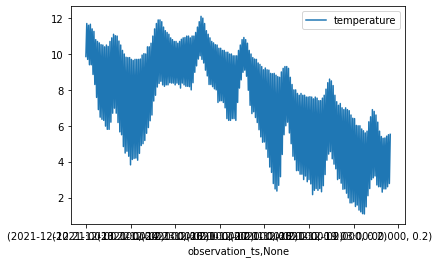

In [2]:
df[['observation_ts', 'temperature']].groupby(['observation_ts']).quantile([.2, .8]).plot()